```{image} ../images/surf-obs.png
:width: 400px
:align: center
:alt: Estación meteorológica de superficie con instrumentos de medición
```

# Estaciones hidrometeorológicas

---

## 🧭 Introducción

Las estaciones hidrometeorológicas constituyen la columna vertebral del monitoreo ambiental en Colombia. Este cuadernillo explora cómo acceder, explorar y visualizar la información proveniente de las estaciones del **IDEAM** (Instituto de Hidrología, Meteorología y Estudios Ambientales), usando Python con las bibliotecas Pandas, Cartopy y Sodapy para acceso a datos abiertos.

Aprenderás a consultar el catálogo nacional de estaciones, visualizar su ubicación geográfica, e integrar consultas de datos históricos y en tiempo casi real desde la plataforma [datosabiertos.gov.co](https://www.datos.gov.co).


1. Introducción a la red de monitoreo del IDEAM
2. Catálogo de estaciones del IDEAM
3. Consulta de datos usando la plataforma [datosabiertos.gov.co](https://www.datos.gov.co/) 
1. Consulta de datos de temperatura y precipitación
1. Otros datos disponibles

### ❓ ¿Por qué es importante?

El acceso programático a datos hidrometeorológicos permite:

- 🌊 **Gestión de riesgo**: Sistemas de alerta temprana para inundaciones
- 🌾 **Agricultura**: Optimización de riego basada en pronósticos
- 🏗️ **Infraestructura**: Diseño de obras considerando eventos extremos
- 🔬 **Investigación**: Análisis de variabilidad y cambio climático

En este cuadernillo desarrollarás las habilidades fundamentales para estos casos de uso.

---

## 📚 Descripción general

Al finalizar este cuadernillo, podrás:

- Acceder al catálogo nacional de estaciones hidrometeorológicas del IDEAM.
- Visualizar estaciones sobre mapas estáticos con Cartopy.
- Consultar series de datos históricos de temperatura y precipitación usando `sodapy`.
- Realizar consultas SQL en la API de *datos abiertos* de Colombia.
- Procesar y graficar series de datos recientes en tiempo cercano al real.

---

## ✅ Requisitos previos


```{list-table}
:header-rows: 1

* - Conceptos
  - Importancia
  - Notas
* - [Introducción a Pandas](https://foundations.projectpythia.org/core/pandas.html)
  - Necesario
  - Lectura de datos tabulares
* - [Introducción a Datetime](https://foundations.projectpythia.org/core/datetime/datetime.html)
  - Necesario
  - Entender estampas de tiempo
* - [Introducción a Cartopy](https://foundations.projectpythia.org/core/cartopy.html)
  - Necesario
  - Visualización de mapas y proyecciones geográficas
```

⏱️ **Tiempo estimado de aprendizaje**: 30 minutos  
✍️ Formato: Interactivo. Ejecuta y modifica el código en cada celda.

---

## Librerías

Importamos las librerías necesarias para este cuaderno.

In [1]:
from datetime import datetime, timedelta

import cartopy.crs as ccrs
import cartopy.feature as feature
import matplotlib.pyplot as plt
import pandas as pd
from sodapy import Socrata
import pandas as pd

## 1. 🗂️ Catálogo nacional de estaciones del IDEAM


### 1.1 📄 Lectura del catálogo

El IDEAM (Instituto de Hidrología, Meteorología y Estudios Ambientales) mantiene un catálogo actualizado de más de 4.000 estaciones hidrometeorológicas activas, suspendidas o en mantenimiento. Este catálogo incluye estaciones **limnimétricas**, **climáticas**, **agrometeorológicas**, **sinópticas**, entre otras, distribuidas por todo el territorio nacional.

```{admonition} 📡 Acceso público
Este catálogo está disponible públicamente a través del portal [datosabiertos.gov.co](https://www.datos.gov.co), que utiliza la plataforma **Socrata** para exponer conjuntos de datos a través de una API REST.
```

```{tip}
**Socrata** es una plataforma de datos abiertos que permite consultar conjuntos de datos públicos mediante una interfaz web o desde código. En Python, podemos acceder fácilmente a estos datos usando la librería [`sodapy`](https://pypi.org/project/sodapy/), que facilita las consultas y permite trabajar con los resultados directamente como `DataFrame`.
```

A continuación, mostramos cómo conectarse al portal y descargar el catálogo nacional de estaciones:


### 🔗 ¿Qué es una API?

Una **API (Interfaz de Programación de Aplicaciones)** permite que programas se comuniquen con bases de datos a través de internet. En lugar de descargar archivos CSV manualmente, podemos:

- Consultar datos específicos de forma programática
- Filtrar antes de descargar (más rápido, menos datos)
- Acceder siempre a la versión más actualizada

La plataforma **Socrata** proporciona una API estandarizada usada por muchos portales de datos abiertos en el mundo, incluyendo [datosabiertos.gov.co](https://www.datos.gov.co).

In [2]:
# Crear cliente sin autenticación (None)
client = Socrata("www.datos.gov.co", None)

# Descargar registros del catálogo nacional de estaciones (máx. 10,000)
results = client.get("hp9r-jxuu", limit=10000)

# Convertir los datos a un DataFrame de Pandas
df_cat = pd.DataFrame.from_records(results)
# Este conjunto de datos incluye la ubicación geográfica de cada estación en formato anidado (ubicaci_n), 
# por lo que es necesario extraer manualmente las coordenadas:
df_cat["latitud"] = df_cat["ubicaci_n"].apply(lambda d: float(d["latitude"]))
df_cat["longitud"] = df_cat["ubicaci_n"].apply(lambda d: float(d["longitude"]))

In [3]:
df_cat.head()

,codigo,nombre,categoria,tecnologia,estado,departamento,municipio,ubicaci_n,altitud,longitud,latitud,fecha_instalacion,area_operativa,area_hidrografica,zona_hidrografica,subzona_hidrografica,entidad,corriente,fecha_suspension
0,11010010,LA VUELTA [11010010],Pluviométrica,Convencional,Activa,Choco,Cértegui,"{'latitude': '5.458944444', 'longitude': '-76....",98,-76.544722,5.458944,15/01/1943,Area Operativa 01 - Antioquia-Chocó,Caribe,Atrato - Darién,Río Andágueda,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,NaN,NaN
1,11017010,AGUASAL [11017010],Limnimétrica,Convencional,Activa,Choco,Lloró,"{'latitude': '5.473943889', 'longitude': '-76....",75,-76.537861,5.473944,15/05/1976,Area Operativa 01 - Antioquia-Chocó,Caribe,Atrato - Darién,Río Andágueda,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Andagueda,NaN
2,11017020,BAGADO [11017020],Limnigráfica,Automática con Telemetría,En Mantenimiento,Choco,Bagadó,"{'latitude': '5.412', 'longitude': '-76.417888...",90,-76.417889,5.412000,29/12/2017,Area Operativa 01 - Antioquia-Chocó,Caribe,Atrato - Darién,Río Andágueda,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Andagueda,NaN
3,11020010,CARMEN DE ATRATO [11020010],Pluviométrica,Convencional,Activa,Choco,El Carmen,"{'latitude': '5.908527778', 'longitude': '-76....",1850,-76.142083,5.908528,15/10/1958,Area Operativa 01 - Antioquia-Chocó,Caribe,Atrato - Darién,Alto Atrato,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,NaN,NaN
4,11020020,GUADUAS [11020020],Pluviométrica,Convencional,Suspendida,Choco,El Carmen,"{'latitude': '5.766666667', 'longitude': '-76....",1500,-76.183333,5.766667,15/03/1977,Area Operativa 01 - Antioquia-Chocó,Caribe,Atrato - Darién,Alto Atrato,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,NaN,15/04/2002


### 1.2 🗺️ Mapa de estaciones

Una vez cargado el catálogo de estaciones, podemos visualizar su distribución geográfica mediante un mapa estático utilizando la librería `Cartopy`.

Este tipo de visualización nos permite identificar la cobertura espacial de la red de monitoreo del IDEAM, así como detectar posibles vacíos geográficos o concentraciones de estaciones en ciertas regiones del país.

A continuación, se muestra cómo generar un mapa base con las estaciones ubicadas mediante coordenadas geográficas (latitud y longitud).


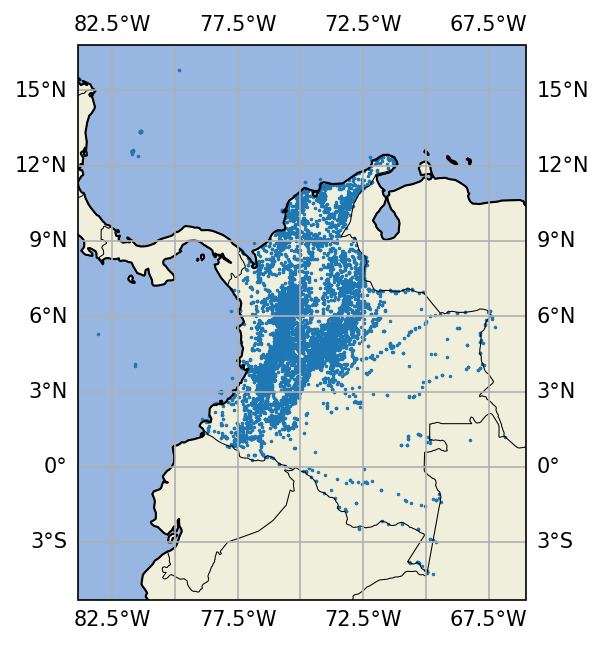

In [4]:
fig, ax = plt.subplots(subplot_kw={"projection": ccrs.PlateCarree()}, dpi=150)
ax.coastlines()
gl = ax.gridlines(draw_labels=True, crs=ccrs.PlateCarree())
ax.scatter(df_cat["longitud"], df_cat["latitud"], transform=ccrs.PlateCarree(), s=0.5)
ax.add_feature(feature.LAND)
ax.add_feature(feature.OCEAN)
ax.add_feature(feature.COASTLINE, linewidth=0.5)
ax.add_feature(feature.BORDERS, linewidth=0.5);

### 1.3 🗂️ Visualización por estado de las estaciones

Además de visualizar todas las estaciones en un único mapa, también es útil representar su distribución según el **estado operativo**: si están **activas**, **en mantenimiento** o **suspendidas**.

Esta visualización facilita:

- Evaluar la cobertura real de la red de monitoreo actual (estaciones activas),
- Identificar regiones con estaciones fuera de servicio,
- Priorizar acciones de mantenimiento o rehabilitación.

In [5]:
df_grp = df_cat.groupby("estado")

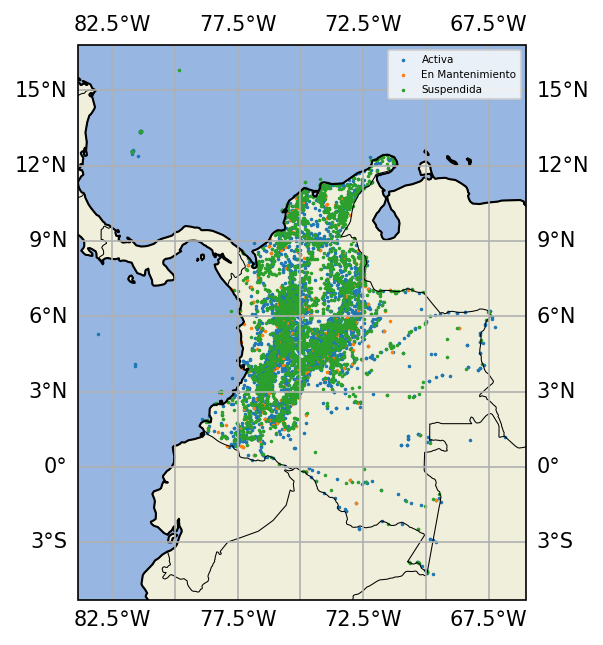

In [6]:
import cartopy.crs as ccrs
import cartopy.feature as feature
import matplotlib.pyplot as plt

fig, ax = plt.subplots(subplot_kw={"projection": ccrs.PlateCarree()}, dpi=150)

for _, group in df_grp:
    ax.scatter(
        group["longitud"],
        group["latitud"],
        transform=ccrs.PlateCarree(),
        s=0.5,
        label=_,
    )

ax.coastlines()
gl = ax.gridlines(draw_labels=True, crs=ccrs.PlateCarree())
ax.add_feature(feature.LAND)
ax.add_feature(feature.OCEAN)
ax.add_feature(feature.COASTLINE, linewidth=0.5)
ax.add_feature(feature.BORDERS, linewidth=0.5)
ax.legend(fontsize=5);

---

### 🏋️ Práctica 1: Explorando tu región

Ahora es tu turno de explorar el catálogo de estaciones.

**Desafío**: 
1. Filtra las estaciones de tu departamento de interés
2. Cuenta cuántas estaciones hay por categoría
3. Identifica cuántas están activas vs suspendidas

**Código inicial**:

In [7]:
# Tu código aquí
mi_departamento = "CUNDINAMARCA"  # Cambia esto

# 1. Filtra por departamento
# df_mi_region = df_cat[df_cat["departamento"] == mi_departamento]

# 2. Cuenta por categoría  
# print(df_mi_region["categoria"].value_counts())

# 3. Cuenta por estado
# print(df_mi_region["estado"].value_counts())

````{admonition} Solución
:class: dropdown

```python
mi_departamento = "CUNDINAMARCA"
df_mi_region = df_cat[df_cat["departamento"] == mi_departamento]

print("Estaciones por categoría:")
print(df_mi_region["categoria"].value_counts())

print("\nEstaciones por estado:")
print(df_mi_region["estado"].value_counts())

print(f"\nTotal: {len(df_mi_region)} estaciones")
```
````

## 2. 🌧️ Consulta de datos históricos desde datosabiertos.gov.co

Una vez conocemos la ubicación y estado de las estaciones hidrometeorológicas, podemos acceder a sus registros históricos —como precipitación, temperatura, humedad, presión, etc.— mediante la plataforma [datosabiertos.gov.co](https://www.datos.gov.co).

Esta plataforma, basada en **Socrata**, ofrece una API pública que permite consultar y filtrar datos por estación, variable, fecha, entre otros criterios.

📌 Cada variable disponible tiene un identificador único llamado `dataset_identifier`. Por ejemplo:

- `s54a-sgyg`: Precipitación
- `sbwg-7ju4`: Temperatura
- `uext-mhny`: Humedad relativa

En esta sección, aprenderás a:
- Conectarte a la API de datos abiertos,
- Consultar registros históricos de una estación específica,
- Visualizar series temporales de variables como la precipitación y temperatura.

### 2.1 ☔ Consulta de datos de precipitación

Usaremos el identificador `s54a-sgyg`, correspondiente a registros de **precipitación** reportada por estaciones automáticas y convencionales.

Primero, realizamos una consulta general para descargar los primeros 2.000 registros:

In [8]:
# Crear cliente de conexión
client = Socrata("www.datos.gov.co", None)

# Descargar registros de precipitación (máximo 2000)
results = client.get("s54a-sgyg", limit=2000)
df_ppt = pd.DataFrame.from_records(results)
df_ppt.head()

,codigoestacion,codigosensor,fechaobservacion,valorobservado,nombreestacion,departamento,municipio,zonahidrografica,latitud,longitud,descripcionsensor,unidadmedida
0,0021202180,0240,2015-04-27T16:05:00.000,0,QUIBA - FOPAE,BOGOTA D.C.,"BOGOTA, D.C",ALTO MAGDALENA,4.543,-74.156,Precipitacion,mm
1,0016027300,0240,2014-09-13T23:20:00.000,0,PUENTE CAPIRA - AUT,NORTE DE SANTANDER,CUCUTILLA,CATATUMBO,7.537194444,-72.77113889,Precipitacion,mm
2,0021195190,0240,2009-01-28T13:10:00.000,0,PASCA - AUT,CUNDINAMARCA,PASCA,ALTO MAGDALENA,4.310111111,-74.31175,Precipitacion,mm
3,0023195190,0240,2008-05-18T14:50:00.000,0,SAN ANTONIO,SANTANDER,FLORIDABLANCA,MEDIO MAGDALENA,7.1,-73.066,Precipitacion,mm
4,0016057030,0240,2012-04-12T06:40:00.000,0,LA CABANA - AUT,NORTE DE SANTANDER,OCAÑA,CATATUMBO,8.197805556,-73.31825,Precipitacion,mm


El conjunto de datos incluye campos como:

- `fechaobservacion`: fecha y hora de la medición  
- `valorobservado`: valor de precipitación (en mm)  
- `codigoestacion` y `nombreestacion`  
- `latitud` y `longitud`  
- `departamento`, `municipio`, `zonahidrografica`  

```{admonition} 💡 Conversión de tipos de datos
:class: tip

En algunos casos, es necesario convertir los tipos de datos antes de analizarlos o graficarlos:

- `fechaobservacion` debe transformarse a tipo `datetime`
- `valorobservado` debe convertirse a tipo `float`
```

### 2.2 🌡️ Serie temporal de temperatura para una estación específica

Ahora consultaremos la serie temporal de **temperatura del aire** registrada por la estación `0021205012`, correspondiente a la **Universidad Nacional, Bogotá**, usando el conjunto de datos identificado como `sbwg-7ju4`.

Al tratarse de una serie histórica extensa, es posible que las solicitudes a la API tarden más de lo normal. Para evitar errores de tipo `Timeout`, recomendamos crear un cliente con un mayor tiempo de espera.

In [9]:
from sodapy import Socrata

# Crear un nuevo cliente con mayor tiempo de espera
client_long = Socrata("www.datos.gov.co", None, timeout=60)

```{admonition} 💡 Sintaxis de filtrado tipo SQL
:class: tip

La API de Socrata usa sintaxis similar a SQL para filtrar datos:

- `where=`: Filtra filas basándose en condiciones
- `IN ('valor')`: Coincide con valores específicos
- `>` y `<`: Comparaciones de rangos de fecha
- `AND`: Combina múltiples condiciones

**Ejemplo**: `"codigoestacion IN ('0021205012') AND fechaobservacion > '2020-01'"`
```

In [10]:
temp_query = client_long.get(
    dataset_identifier="sbwg-7ju4",
    select="fechaobservacion, valorobservado, codigoestacion",
    where="codigoestacion IN ('0021205012') AND fechaobservacion > '2020-01' AND fechaobservacion < '2020-02'",
    limit=1000,
)


# Convertir resultados a DataFrame
df_temp = pd.DataFrame.from_records(temp_query)
df_temp.head()

,fechaobservacion,valorobservado,codigoestacion
0,2020-01-21T09:00:00.000,17.8,0021205012
1,2020-01-21T19:00:00.000,15.2,0021205012
2,2020-01-21T14:00:00.000,16.2,0021205012
3,2020-01-21T16:00:00.000,18.3,0021205012
4,2020-01-21T23:00:00.000,12.7,0021205012


Convertimos los datos a los tipos adecuados antes de graficarlos:

In [11]:
# Conversión de tipos y orden temporal
df_temp["fechaobservacion"] = pd.to_datetime(df_temp["fechaobservacion"])
df_temp["valorobservado"] = df_temp["valorobservado"].astype(float)
df_temp.set_index("fechaobservacion", inplace=True)
df_temp = df_temp.sort_index()
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 743 entries, 2020-01-01 01:00:00 to 2020-01-31 23:00:00
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   valorobservado  743 non-null    float64
 1   codigoestacion  743 non-null    object 
dtypes: float64(1), object(1)
memory usage: 17.4+ KB


Finalmente, graficamos la serie temporal de temperatura:

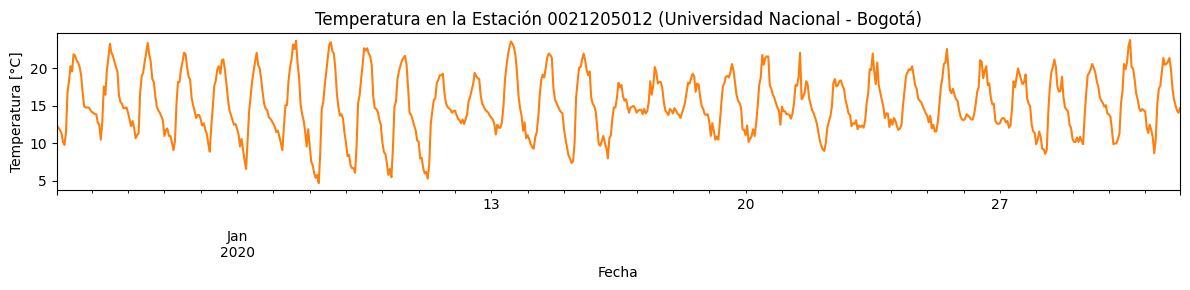

In [12]:

# Graficar serie de temperatura
fig, ax = plt.subplots(figsize=(12, 3))
df_temp["valorobservado"].plot(ax=ax, color="C1")

ax.set_title("Temperatura en la Estación 0021205012 (Universidad Nacional - Bogotá)")
ax.set_ylabel("Temperatura [°C]")
ax.set_xlabel("Fecha")

plt.tight_layout()

---

### 🏋️ Práctica 2: Consulta personalizada

Aplica lo aprendido consultando datos de una estación de tu interés.

**Desafío**: Consulta temperatura de otra estación para un mes diferente.

**Pistas**:
- Dataset: `"sbwg-7ju4"`
- Usa fechas recientes (ej. mes pasado)
- Convierte tipos de datos antes de graficar

In [13]:
# Tu código aquí
# Elige tu estación y fechas, luego consulta y grafica

```{admonition} ⚠️ Evita consultar rangos de datos muy amplios
:class: warning

La plataforma de datos abiertos **Socrata** impone límites de uso y puede restringir consultas que:

- Acceden a un número muy alto de registros (varios miles).
- Cubren periodos de tiempo muy amplios (años completos o toda la base de datos).
- Se realizan sin autenticación (sin `app_token`).

💡 Para evitar errores como `ReadTimeout`, `ThrottlingError` o consultas vacías, **limita tu consulta a periodos cortos**, por ejemplo un mes a la vez:

```python
where="codigoestacion IN ('0021205012') AND fechaobservacion > '2020-01' AND fechaobservacion < '2020-02'"


```{hint}
📘 Para obtener más información sobre los parámetros que acepta la función `get()`, puedes ejecutar:

\```python
client.get?
\```
```

## 3. ⏱️ Datos en tiempo "Cuasi-real" de IDEAM

Además del acceso a información histórica, el IDEAM publica un conjunto de datos adicional que contiene observaciones en **tiempo cercano a la medición** (también llamado *cuasi-real*). Este conjunto de datos está disponible en [datosabiertos.gov.co](https://www.datos.gov.co/es/Ambiente-y-Desarrollo-Sostenible/Datos-de-Estaciones-de-IDEAM-y-de-Terceros/57sv-p2fu) y corresponde al siguiente identificador:

\```python
dataset_identifier = "57sv-p2fu"
\```

📡 Este conjunto de datos permite acceder a las lecturas más recientes reportadas por estaciones automáticas del IDEAM y de terceros, incluyendo variables como temperatura, precipitación, viento y presión, entre otros.

🚨 A diferencia de los conjuntos de datos históricos como `s54a-sgyg` (precipitación) o `sbwg-7ju4` (temperatura), este recurso:

- Está diseñado para monitoreo **en línea** o con muy poco retardo.
- Puede contener observaciones con menor validación o control de calidad.
- Agrupa datos de sensores diversos en una sola tabla.
- Incluye estaciones del IDEAM **y también estaciones de terceros**.

A continuación, realizamos una consulta básica para ver qué columnas contiene esta tabla, filtrando las observaciones de los últimos 5 días:

In [14]:
from datetime import datetime, timedelta
from pandas import to_datetime

# Establecer rango de fechas recientes
fecha_inicio = datetime.now() - timedelta(days=5)
fecha_inicio_str = f"{to_datetime(fecha_inicio):%Y-%m-%d}"

# Consulta al dataset cuasi-real
nrt_query = client.get(
    dataset_identifier="57sv-p2fu",
    select="*",
    where=f"fechaobservacion >= '{fecha_inicio_str}'",
    limit=1000
)

# Convertir a DataFrame
df_nrt = pd.DataFrame.from_records(nrt_query)
df_nrt.head()

,codigoestacion,codigosensor,fechaobservacion,valorobservado,nombreestacion,departamento,municipio,zonahidrografica,latitud,longitud,descripcionsensor,unidadmedida,entidad
0,0017015010,0258,2025-10-23T00:32:00.000,1010.4,AEROPUERTO SESQUICENTENARIO,ARCHIPIELAGO DE SAN ANDRES PROVIDENCIA Y SANTA...,SAN ANDRÉS,ISLAS CARIBE,12.587849,-81.701117,GPRS - PRESIÓN ATMOSFÉRICA,hPA,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...
1,0026125061,0111,2025-10-23T00:32:00.000,1.4,AEROPUERTO EL EDEN -,QUINDÍO,ARMENIA,CAUCA,4.454722222,-75.76638889,GPRS - VELOCIDAD DEL VIENTO,m/s,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...
2,0027015330,0257,2025-10-23T00:32:00.000,0,AEROPUERTO OLAYA HERRERA,ANTIOQUIA,MEDELLÍN,NECHÍ,6.2246389,-75.5882,GPRS - PRECIPITACIÓN,mm,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...
3,0026125710,0028,2025-10-23T00:32:00.000,88,AEROPUERTO MATECANA,RISARALDA,PEREIRA,CAUCA,4.812675,-75.739519444,GPRS - HUMEDAD DEL AIRE A 2 m,%,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...
4,0026125061,0070,2025-10-23T00:31:00.000,11.1,AEROPUERTO EL EDEN -,QUINDÍO,ARMENIA,CAUCA,4.454722222,-75.76638889,TEMPERATURA MÍNIMA DEL AIRE A 2 m,°C,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...


🔎 Este conjunto de datos es ideal para desarrollar sistemas de monitoreo operativo, alertas tempranas, o visualizar fenómenos meteorológicos recientes. Sin embargo, no es recomendable usarlo directamente para análisis climatológicos de largo plazo debido a su naturaleza preliminar.

En la siguiente subsección exploraremos cómo filtrar los datos por estación y sensor, y generar una serie temporal.

### 3.1 📈 Serie temporal cuasi-real por estación y sensor

Podemos consultar datos cuasi-reales de una estación específica utilizando su `codigoestacion` y el `codigosensor` correspondiente a la variable de interés. Por ejemplo, el sensor `0071` reporta **temperatura del aire**.

A continuación, filtramos los datos recientes de la estación **Aeropuerto Alberto Lleras Camargo (Sogamoso)** con código `0024035340`.

In [15]:
# Parámetros de consulta
cod_est = "0024035340"  # Aeropuerto de Sogamoso
cod_sensor = "0071"     # Sensor de temperatura

# Consulta de temperatura en tiempo cuasi-real
aero_query = client.get(
    dataset_identifier="57sv-p2fu",
    select="fechaobservacion, valorobservado",
    where=f"fechaobservacion >= '{fecha_inicio_str}' \
            AND codigoestacion IN ('{cod_est}') \
            AND codigosensor IN ('{cod_sensor}')",
    limit=2000
)

# Convertir a DataFrame
df_aero = pd.DataFrame.from_records(aero_query)
df_aero["fechaobservacion"] = pd.to_datetime(df_aero["fechaobservacion"])
df_aero["valorobservado"] = df_aero["valorobservado"].astype(float)
df_aero = df_aero.set_index("fechaobservacion").sort_index()

In [16]:
df_aero

,valorobservado
fechaobservacion,
2025-10-22 02:02:00,12.1
2025-10-22 02:04:00,12.3
2025-10-22 02:06:00,12.4
2025-10-22 02:08:00,12.4
2025-10-22 02:10:00,12.3
...,...
2025-10-23 16:58:00,20.6
2025-10-23 17:00:00,20.9
2025-10-23 17:02:00,21.1


Ahora generemos un gráfico rápido de la serie de temperatura para las últimas 24 horas

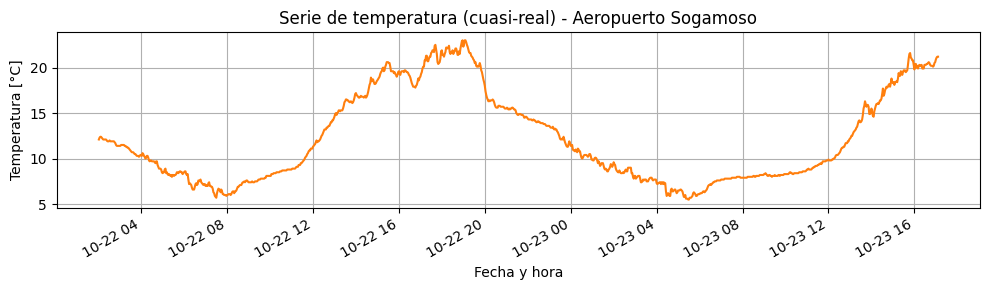

In [17]:
# Visualización de la serie temporal
fig, ax = plt.subplots(figsize=(10, 3))
df_aero["valorobservado"].plot(ax=ax, color="C1")

ax.set_title("Serie de temperatura (cuasi-real) - Aeropuerto Sogamoso")
ax.set_ylabel("Temperatura [°C]")
ax.set_xlabel("Fecha y hora")
ax.grid(True)
plt.tight_layout()

### 3.2 📊 Múltiples estaciones, un mismo sensor

También es posible consultar simultáneamente varias estaciones que reportan una misma variable —por ejemplo, **temperatura del aire**— filtrando por su `codigoestacion` y el mismo `codigosensor`.

A continuación, consultamos datos recientes del sensor de temperatura (`codigosensor = "0071"`) para dos estaciones:

- **Aeropuerto de Sogamoso** (`0024035340`)
- **Universidad Nacional, Bogotá** (`0021205012`)

In [24]:
# Estaciones a consultar
estaciones = {
    "0024035340": "Sogamoso - Aeropuerto",
    "0027015330": "AEROPUERTO OLAYA HERRERA"
}
sensor_temp = "0071"
estaciones_str = ", ".join([f"'{e}'" for e in estaciones.keys()])

# Consulta
multi_query = client.get(
    dataset_identifier="57sv-p2fu",
    select="fechaobservacion, valorobservado, codigoestacion",
    where=f"fechaobservacion >= '{fecha_inicio_str}' \
            AND codigosensor IN ('{sensor_temp}') \
            AND codigoestacion IN ({estaciones_str})",
    limit=3000
)

# Procesamiento
df_multi = pd.DataFrame.from_records(multi_query)
df_multi["fechaobservacion"] = pd.to_datetime(df_multi["fechaobservacion"])
df_multi["valorobservado"] = df_multi["valorobservado"].astype(float)
df_multi = df_multi.sort_values("fechaobservacion")

Antes de graficar los resultados, es importante asegurarnos de que los datos han sido correctamente transformados:

- La columna `fechaobservacion` debe convertirse a `datetime`.
- El campo `valorobservado` debe convertirse a `float`.
- Ordenamos los datos por fecha para asegurar una visualización coherente.

A continuación, graficamos la **serie temporal de temperatura** para cada estación, usando un color diferente por cada una.


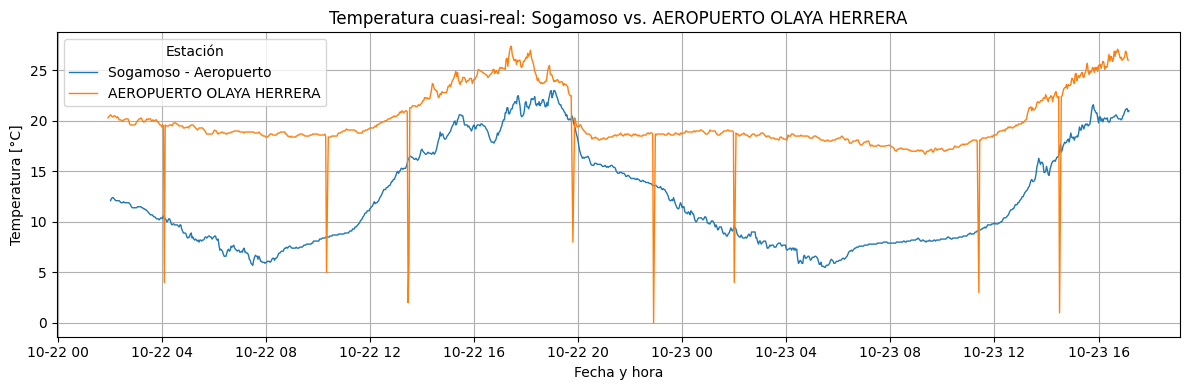

In [27]:
# Gráfico
fig, ax = plt.subplots(figsize=(12, 4))

for codigo, nombre in estaciones.items():
    df_plot = df_multi[df_multi["codigoestacion"] == codigo]
    if not df_plot.empty:
        ax.plot(
            df_plot["fechaobservacion"],
            df_plot["valorobservado"],
            label=nombre,
            lw=1
        )
    else:
        print(f"⚠️ No hay datos recientes para la estación: {nombre}")

ax.set_title("Temperatura cuasi-real: Sogamoso vs. AEROPUERTO OLAYA HERRERA")
ax.set_ylabel("Temperatura [°C]")
ax.set_xlabel("Fecha y hora")
ax.legend(title="Estación")
ax.grid(True)
plt.tight_layout()

📌 Esta estrategia es útil para comparar condiciones meteorológicas en diferentes regiones del país en tiempo cuasi-real. Puedes usar esta técnica para otras variables como **precipitación**, **humedad** o **viento**, cambiando el `codigosensor`.

🔍 Si no conoces el código de sensor para una variable específica, puedes consultar los datos sin filtrar por `codigosensor` y luego explorar los valores únicos con:

\```python
df_nrt["codigosensor"].unique()
\```

---

## ✅ Resumen

¡Felicitaciones! Has desarrollado habilidades clave en acceso a datos hidrometeorológicos:

✅ **Consultar APIs REST** con Python usando Socrata/sodapy

✅ **Procesar datos geoespaciales** en formato tabular

✅ **Visualizar estaciones** sobre mapas con Cartopy

✅ **Filtrar series temporales** de variables meteorológicas

✅ **Integrar datos históricos** y en tiempo cuasi-real del IDEAM

```{tip}
Las técnicas aprendidas son fácilmente adaptables a otras variables, sensores y estaciones para construir soluciones personalizadas.
```

---

## 🚀 ¿Qué sigue?

Ahora que dominas el acceso a datos de estaciones, puedes explorar:

- **[2.2. Radar meteorológico]** - Datos de radar del IDEAM
- **[Aplicaciones científicas]** - Análisis de ENSO y eventos extremos

### Proyecto sugerido:

Desarrolla un sistema de monitoreo que descargue datos cuasi-reales cada hora y genere alertas cuando se superen umbrales de precipitación.

⚠️ Recuerda limitar el tamaño de las consultas realizadas a Socrata para evitar errores por **tiempos de espera** o **restricciones de uso** del API.


## 📚 Recursos y referencias
* Rose, B. E. J., Kent, J., Tyle, K., Clyne, J., Banihirwe, A., Camron, D., May, R., Grover, M., Ford, R. R., Paul, K., Morley, J., Eroglu, O., Kailyn, L., & Zacharias, A. (2023). *Pythia Foundations* (Version v2023.05.01). [https://doi.org/10.5281/zenodo.7884572](https://doi.org/10.5281/zenodo.7884572)

* Portal de datos abiertos de Colombia – IDEAM:  
  [https://www.datos.gov.co](https://www.datos.gov.co)

* Documentación de Socrata Open Data API (SODA):  
  [https://dev.socrata.com/](https://dev.socrata.com/)

* Repositorio de datos hidrometeorológicos crudos – IDEAM:  
  [https://www.datos.gov.co/Ambiente-y-Desarrollo-Sostenible/Datos-Hidrometeorol-gicos-Crudos-Red-de-Estaciones/sbwg-7ju4](https://www.datos.gov.co/Ambiente-y-Desarrollo-Sostenible/Datos-Hidrometeorol-gicos-Crudos-Red-de-Estaciones/sbwg-7ju4)

* Cuaderno basado en la infraestructura educativa abierta del proyecto [Project Pythia](https://projectpythia.org/)
